# EE535P SYSTEMS DESIGN

# Title:- Empirical Study Of Random Projection.

## Content.

###    1. Experiment_1
         1. Experiment_1_A
            JL-Lemma Experiment.
         2. Experiment_1_B
            Experiment to find relationship between RMSE values and Reduced Dimesion
         3. Experiment_1_C
            Experiment to show that projected dimension d does not depend on the original dimension n. and To find minimum 
            No. of projected Dimension of 10000 Samples dataset at various eps values. 
###    2. Experiment_2
         To Show Eccentricity before and after Random Projection. 

###    3. Experiment_3
         To Find the Euclidian Distance between Clusters.
         

In [4]:
import sys
from time import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.datasets import load_digits
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils.fixes import parse_version
from sklearn.utils.fixes import parse_version
from sklearn.random_projection import SparseRandomProjection, johnson_lindenstrauss_min_dim
from sklearn.random_projection import GaussianRandomProjection
import numpy as np
from matplotlib import pyplot as plt
import sklearn.datasets as dt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from numpy.linalg import eigh
import math

### * Experiment_1_A
     
#####  JL-Lemma Proof.
   * Data set is generated, as per JL lemma euclidian distance between any two point before and after projection is consstant    with some error range, i.e esp= 0.5.
     
   * Here dataset of samples=10000 with feature=5000 with standard deviation of 0.1 is generated using make_blobs function.Euclidian distance between samples are calculated before and after projection, and results are plotted and observed.
       
     

In [5]:
#Dataset Generation
x,y = make_blobs(n_samples=10000,n_features=5000,centers=1,cluster_std=0.1)
#x, y = make_regression(n_samples=1000, n_features=500)
#x= np.random.rand(10000, 4000)
print(x.shape)

(10000, 5000)


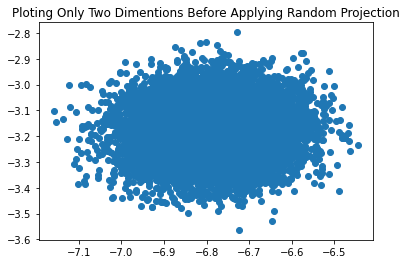

In [6]:
# Code For Ploting Only 2 Dimension from 5000 Dimension
xpoint1=[]
ypoint1=[]
for point in x:
    xpoint1.append(point[0])
    ypoint1.append(point[1])
plt.scatter(xpoint1,ypoint1) #Concept Clear, How Work.
plt.title('Ploting Only Two Dimentions Before Applying Random Projection')
plt.show()

In [7]:
# Calculating Euclidian Distance Between Samples Before Applying Random Projection.
dist=euclidean_distances(x)
print('*******************Distance Between Samples Before Random Projection*******************\n')
print(dist)
print('\n Dimension of Distance Matrix is :-',dist.shape)

*******************Distance Between Samples Before Random Projection*******************

[[ 0.          9.8881654   9.99032785 ...  9.99795149  9.95279542
  10.08982287]
 [ 9.8881654   0.          9.95596273 ...  9.95673555  9.74722412
   9.78551536]
 [ 9.99032785  9.95596273  0.         ... 10.06331721  9.89426062
  10.03954993]
 ...
 [ 9.99795149  9.95673555 10.06331721 ...  0.         10.01121362
   9.89763293]
 [ 9.95279542  9.74722412  9.89426062 ... 10.01121362  0.
   9.91200757]
 [10.08982287  9.78551536 10.03954993 ...  9.89763293  9.91200757
   0.        ]]

 Dimension of Distance Matrix is :- (10000, 10000)


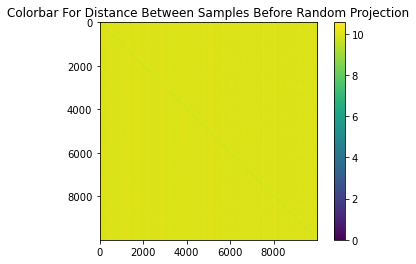

In [8]:
# Colorbar For Distance between Original samples.
plt.imshow(dist)
plt.colorbar()
plt.title("Colorbar For Distance Between Samples Before Random Projection")
plt.show()

In [9]:
# Applying Gaussian Random Projection on Datasets.
gauss_proj = GaussianRandomProjection(eps=0.5)
X_transform = gauss_proj.fit_transform(x) 
print('Dimension of Dataset After Applying Random Projection with eps = 0.5 :-',X_transform.shape) 
#Observe the dimesion of Projected Dataset.

Dimension of Dataset After Applying Random Projection with eps = 0.5 :- (10000, 442)


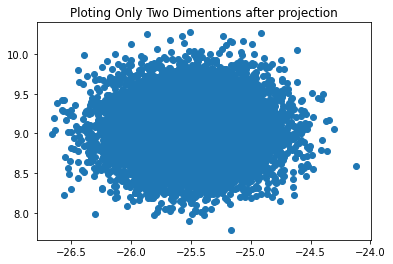

In [10]:
# Plotting Only Two Dimension from
xpoint2=[]
ypoint2=[]
for point in X_transform:
    xpoint2.append(point[0])
    ypoint2.append(point[1])
plt.scatter(xpoint2,ypoint2) #Concept Clear, How Work.
plt.title('Ploting Only Two Dimentions after projection')
plt.show()

In [11]:
# Calculating euclidean distances between samples after projecting to lower dimension.
dist_raw = euclidean_distances(x)
dist_transform = euclidean_distances(X_transform)
print('**********Distance Between Samples After Random Projection**********\n')
print(dist_transform)

**********Distance Between Samples After Random Projection**********

[[ 0.          9.42512614  9.60454831 ...  9.43715107  9.50393203
   9.96562294]
 [ 9.42512614  0.          9.85112024 ...  9.59942006  9.24011401
   9.33766046]
 [ 9.60454831  9.85112024  0.         ...  9.69377678  9.87891802
  10.77679372]
 ...
 [ 9.43715107  9.59942006  9.69377678 ...  0.          9.32574203
   9.67893823]
 [ 9.50393203  9.24011401  9.87891802 ...  9.32574203  0.
  10.0586824 ]
 [ 9.96562294  9.33766046 10.77679372 ...  9.67893823 10.0586824
   0.        ]]


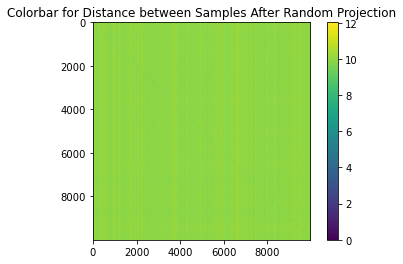

In [12]:
# Colorbar For Distance between Transformed samples.
plt.imshow(dist_transform)
plt.colorbar()
plt.title("Colorbar for Distance between Samples After Random Projection")
plt.show()

###### Below is the code for for JL-lemma proof.  Resultant matrix shows that, difference of euclidean distance between Projected samples and Original samples. distancces between samples are near about same(Within esp. range). Here difference is depend on eps. values, as eps. values are increases the range of error between difference also increases resulting increase in Projected Dimension. 

In [18]:
# Calculating Difference of distance between Original samples and Projected samples.
abs_diff_gauss = (abs(dist_raw - dist_transform))
print("Difference Between distance of samples before projection and after projection.\n")
print(abs_diff_gauss)

Difference Between distance of samples before projection and after projection.

[[0.         0.46303926 0.38577955 ... 0.56080042 0.44886339 0.12419993]
 [0.46303926 0.         0.10484249 ... 0.35731549 0.50711012 0.44785491]
 [0.38577955 0.10484249 0.         ... 0.36954043 0.0153426  0.73724379]
 ...
 [0.56080042 0.35731549 0.36954043 ... 0.         0.68547159 0.2186947 ]
 [0.44886339 0.50711012 0.0153426  ... 0.68547159 0.         0.14667483]
 [0.12419993 0.44785491 0.73724379 ... 0.2186947  0.14667483 0.        ]]


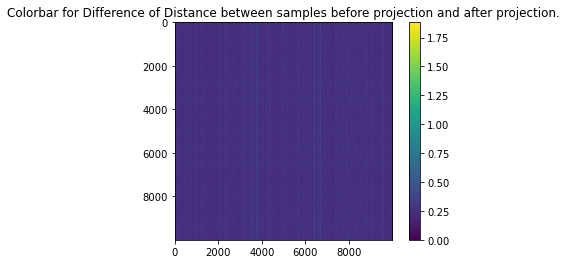

In [14]:
#%% Colorbar for Difference Matrix of distance between Original samples and Projected samples.
plt.imshow(abs_diff_gauss)
plt.colorbar()
plt.title("Colorbar for Difference of Distance between samples before projection and after projection.")
plt.show()

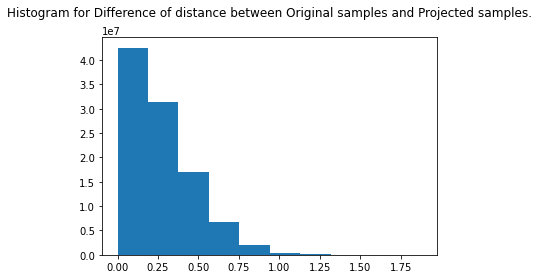

In [15]:
# Histogram of difference matrix.
plt.hist(abs_diff_gauss.flatten())
plt.title("Histogram for Difference of distance between Original samples and Projected samples.\n") 
plt.show()

In [21]:
x,y = make_blobs(n_samples=10000,n_features=5000,centers=1,cluster_std=0.1)
#x, y = make_regression(n_samples=1000, n_features=500)
#x= np.random.rand(10000, 4000)
print(x.shape)

(10000, 5000)


### * Experiment_1_B
#####  Experiment to find relationship between RMSE values and Reduced Dimesion.
   * Here dataset of 10000 samples are used for this Experiment. and Plot is generated for range of various reduced dimension values. 
     
   * From the observation we can conclude that, as the reduced dimensions increases the RMSE value is decreases.


In [22]:
dimnsn=[200,500,800,1000,1500,2000,3000,4000,4500,4800]
rms=[]
for val in dimnsn:
    gauss_proj = GaussianRandomProjection(val)
    X_tranfrm = gauss_proj.fit_transform(x)
    dist_raw = euclidean_distances(x)
    dist_transform = euclidean_distances(X_tranfrm)
    new=abs(dist_raw-dist_transform )
    rms.append(np.sqrt(np.mean(new**2)))

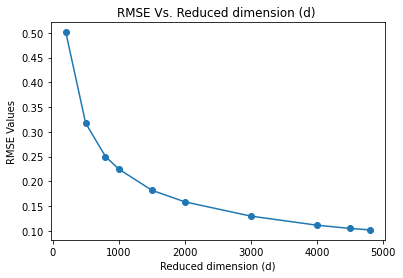

In [47]:
plt.plot(dimnsn,rms,marker='o')
plt.xlabel('Reduced dimension (d)')
plt.ylabel('RMSE Values')
plt.title('RMSE Vs. Reduced dimension (d) ')
plt.show()

### * Experiment_1_C
     
#####  Experiment to finding minimum No. of projected Dimension of 10000 Samples dataset at various eps values.
   * Here dataset of 10000 samples are used for this Experiment. and Plot is generated for range of Eps. values. 
     
   * From the observation we can conclude that, as the Eps. value increases the projected dimension is decreases. One more observation can be drawn from  the below graph, is that 'There will be minimun value of Eps for which we will get expected projected dimension. Below this Minimum Eps. value we will get Projected dimension greater than the Original dimension', this will throw an error.
   
   * Here Experiment is carried out on set of original dimension value and applying Random projection at constant eps value i.e. eps=0.8. plot is generated. Here We can conclude that projected dimension is independent of Original Dimension at constant eps and samples.

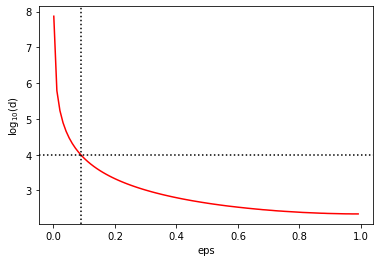

In [24]:
#%%
eps = np.arange(0.001, 0.999, 0.01)
min_dim = johnson_lindenstrauss_min_dim(n_samples=10000, eps=eps)    
plt.plot(eps, np.log10(min_dim), c='r')    
plt.xlabel('eps')
plt.ylabel('log$_{10}$(d)')
plt.axhline(y=4, color='k',linestyle=':')
plt.axvline(x=0.09, color='k',linestyle=':')
plt.show()

In [25]:
#%%
dim_mat=[1000,2000,3000,3500,6000,8000]
m=[10000]
min_array=[]
for org_dim in dim_mat:
    x,y = make_blobs(n_samples= 10000,centers=1,cluster_std=1.0,n_features= org_dim )
    gauss_proj = GaussianRandomProjection(eps=0.8)
    X_transform = gauss_proj.fit_transform(x) #Transformed Data
    min_dim=X_transform.shape[1]
    min_array.append(min_dim)

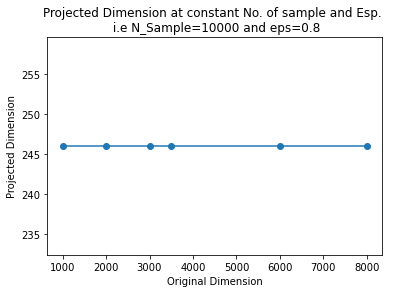

In [26]:
#%%
plt.plot(dim_mat,min_array,marker='o')
plt.xlabel('Original Dimension')
plt.ylabel('Projected Dimension')
plt.title('Projected Dimension at constant No. of sample and Esp. \n i.e N_Sample=10000 and eps=0.8')
plt.show()

### * Experiment_2
     
#####  Experiment to calculating Eccentricity before and After Projection.
   * Here Dataset of 10000 samples with 5000 feature is taken to Experiment. Eccentricity is Calculated before and after projecting data and some canclusion are made on observations.
     
   * By Observing the result one can  conclude that, as projected dimension decreases the eccentricity of projected data also decreases, and cluster become more and more sperical. This result will help while tranning model, as sperical model are easy to train.

In [27]:
#Dataset Generation using make_regression method. Dataset with 10000 samples and 5000 feature are generated for this experiment.
#x,y = make_blobs(n_samples=10000,centers=1,cluster_std=10000.0,n_features=5000)
x, y = make_regression(n_samples=10000, n_features=5000,tail_strength=1)
#x= np.random.rand(10000, 4000)
print(x.shape)

(10000, 5000)


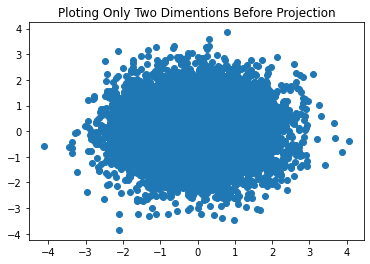

In [28]:
# Code for ploting only two dimension from 5000 feature.
xpoint1=[]
ypoint1=[]
for point in x:
    xpoint1.append(point[0])
    ypoint1.append(point[1])
plt.scatter(xpoint1,ypoint1) #Concept Clear, How Work.
plt.title('Ploting Only Two Dimentions Before Projection')
plt.show()

In [29]:
#%%

min_dim= 10
max_dim= x.shape[1]-1
eccentricity=[]
dimension=[]
exp_range=[500,800,1000,1500,2000,2500,3500,4000,4400,4600,4800]
for dim in exp_range:
    gauss_proj = GaussianRandomProjection(dim)
    X_transform = gauss_proj.fit_transform(x)
    X_T1=np.transpose(X_transform)
    l1=(X_T1.shape[0]-1)
    cv1=np.cov(X_T1)
    w1,v1=eigh(cv1)
    r1=w1[l1]/w1[0]
    ra1=math.sqrt(abs(r1))
    eccentricity.append(ra1)
    dimension.append(dim)
    print('Projected Dimension:-',dim)
    print('Eccentricity After Projection for:- ',ra1)

Projected Dimension:- 500
Eccentricity After Projection for:-  2.2047427563425854
Projected Dimension:- 800
Eccentricity After Projection for:-  2.7689938749585936
Projected Dimension:- 1000
Eccentricity After Projection for:-  3.189495110822269
Projected Dimension:- 1500
Eccentricity After Projection for:-  4.344086471511498
Projected Dimension:- 2000
Eccentricity After Projection for:-  5.91945230275876
Projected Dimension:- 2500
Eccentricity After Projection for:-  8.06423944809315
Projected Dimension:- 3500
Eccentricity After Projection for:-  16.779575881136843
Projected Dimension:- 4000
Eccentricity After Projection for:-  28.42678470312328
Projected Dimension:- 4400
Eccentricity After Projection for:-  49.44474016141215
Projected Dimension:- 4600
Eccentricity After Projection for:-  74.18733118704415
Projected Dimension:- 4800
Eccentricity After Projection for:-  157.57383275080576


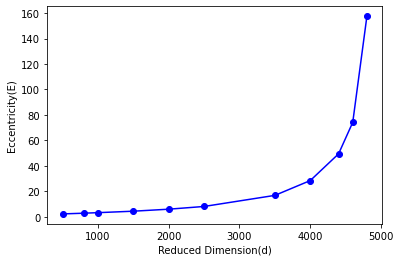

In [30]:
#%% Visualization Graph
plt.plot(dimension,eccentricity,marker='o', c='b')
plt.xlabel('Reduced Dimension(d)')
plt.ylabel('Eccentricity(E)')
plt.show()

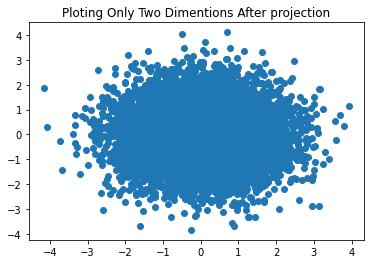

In [31]:
#
xpoint2=[]
ypoint2=[]
for point in X_transform:
    xpoint2.append(point[0])
    ypoint2.append(point[1])
plt.scatter(xpoint2,ypoint2) #Concept Clear, How Work.
plt.title('Ploting Only Two Dimentions After projection')
plt.show()


### * Experiment_3
     
#####  Experiment to calculate the seperation between mixture of gaussian clusters by using Random Projection and PCA.
   * Here Dataset of 5 different gaussian with 10000 samples and 500 feature is taken to carry out Experiment.
     
   * Ecludean distance between mean of each gaussian is calcualted before projection and after projecting data by using Random Projection and PCA. after observing the result we can conclude that, 1. After projecting data to low dimension by using Random Process the euclidean distance between mean of gaussian cluster will remain almost same. and 2. After projecting data to low dimension by using PCA the euclidean distance between mean of gaussian will reduces drasrtically. all the gaussian cluster will collapse to one and will conencide on each other.  

In [32]:
# Generating dataset of 5 gaussian mixture with 10000 sample No. and 500 feature.
X, y = make_blobs(n_samples=10000, centers=5, n_features=500,cluster_std=2.0)

In [33]:
# Separating Gaussian as per same Classes.
Data=X
c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
for point in range(len(y)):
    if y[point] == 0:
       c1.append(Data[point])
    if y[point] == 1:
       c2.append(Data[point])
    if y[point] == 2:
       c3.append(Data[point])
    if y[point] == 3:
       c4.append(Data[point])
    if y[point] == 4:
       c5.append(Data[point])
c1=np.array(c1)
c2=np.array(c2)
c3=np.array(c3)
c4=np.array(c4)
c5=np.array(c5)
Classes= { "c1":c1, "c2" : c2, "c3" : c3 , "c4" : c4 , "c5" : c5}

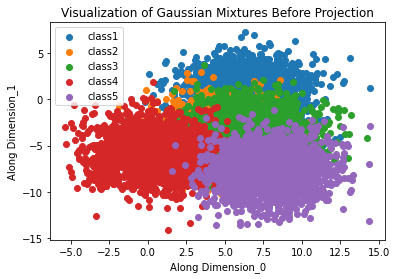

In [34]:
# Code for Ploting Data.
xpoint1=[]
ypoint1=[]
for point in c1:
    xpoint1.append(point[0])
    ypoint1.append(point[1])
plt.scatter(xpoint1,ypoint1,label='class1')
xpoint2=[]
ypoint2=[]
for point in c2:
    xpoint2.append(point[0])
    ypoint2.append(point[1])
plt.scatter(xpoint2,ypoint2,label='class2')
xpoint3=[]
ypoint3=[]
for point in c3:
    xpoint3.append(point[0])
    ypoint3.append(point[1])
plt.scatter(xpoint3,ypoint3,label='class3')
xpoint4=[]
ypoint4=[]
for point in c4:
    xpoint4.append(point[0])
    ypoint4.append(point[1])
plt.scatter(xpoint4,ypoint4,label='class4')
xpoint5=[]
ypoint5=[]
for point in c5:
    xpoint5.append(point[0])
    ypoint5.append(point[1])
plt.scatter(xpoint5,ypoint5,label='class5')
plt.xlabel("Along Dimension_0")
plt.ylabel("Along Dimension_1")
plt.title("Visualization of Gaussian Mixtures Before Projection")
plt.legend()
plt.show()

In [35]:
# Code for Finding mean of each gaussian distribution Before Projection.
mean_original=[]
for clss in Classes.values():
    temp=np.mean(clss)
    mean_original.append(temp)
mean_original=np.array(mean_original).reshape(-1,1)

[[0.         0.59112373 0.62744052 0.36582104 0.27719344]
 [0.59112373 0.         0.0363168  0.95694477 0.31393029]
 [0.62744052 0.0363168  0.         0.99326157 0.35024709]
 [0.36582104 0.95694477 0.99326157 0.         0.64301448]
 [0.27719344 0.31393029 0.35024709 0.64301448 0.        ]]


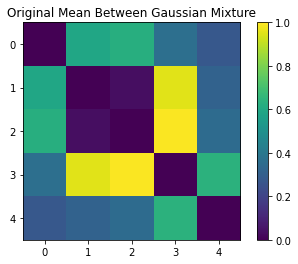

In [36]:
# Code to find Euclidian Distance Between Mean.
mean_dist = euclidean_distances(mean_original)
print(mean_dist)
plt.imshow(mean_dist)
plt.colorbar()
plt.clim(0,1)
plt.title("Original Mean Between Gaussian Mixture")
plt.show()

In [37]:
# Applying Random Projection to each gaussian mixture.
gauss_proj = GaussianRandomProjection(200)
C1_transform = gauss_proj.fit_transform(c1)
C2_transform = gauss_proj.fit_transform(c2)
C3_transform = gauss_proj.fit_transform(c3)
C4_transform = gauss_proj.fit_transform(c4)
C5_transform = gauss_proj.fit_transform(c5)

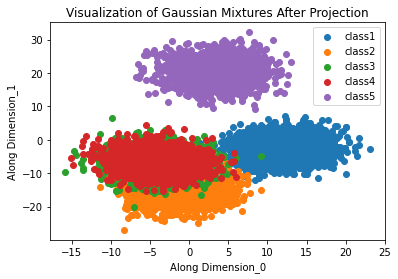

In [38]:
# Plotting projected data from each Gaussian distribution.
xpoint1=[]
ypoint1=[]
for point in C1_transform:
    xpoint1.append(point[0])
    ypoint1.append(point[1])
plt.scatter(xpoint1,ypoint1,label='class1')
xpoint2=[]
ypoint2=[]
for point in C2_transform:
    xpoint2.append(point[0])
    ypoint2.append(point[1])
plt.scatter(xpoint2,ypoint2,label='class2')
xpoint3=[]
ypoint3=[]
for point in C3_transform:
    xpoint3.append(point[0])
    ypoint3.append(point[1])
plt.scatter(xpoint3,ypoint3,label='class3')
xpoint4=[]
ypoint4=[]
for point in C4_transform:
    xpoint4.append(point[0])
    ypoint4.append(point[1])
plt.scatter(xpoint4,ypoint4,label='class4')
xpoint5=[]
ypoint5=[]
for point in C5_transform:
    xpoint5.append(point[0])
    ypoint5.append(point[1])
plt.scatter(xpoint5,ypoint5,label='class5')
plt.xlabel("Along Dimension_0")
plt.ylabel("Along Dimension_1")
plt.title("Visualization of Gaussian Mixtures After Projection")
plt.legend()
plt.show()

In [39]:
# Finding Mean After Projection using Random Projection.
Transformed_Classes= { "C1_transform":C1_transform, "C2_transform" : C2_transform, "C3_transform" : C3_transform , "C4_transform" : C4_transform , "C5_transform" : C5_transform}
mean_transformed=[]
temp=0
for clss in Transformed_Classes.values():
    temp=np.mean(clss)
    mean_transformed.append(temp)
mean_transformed=np.array(mean_transformed).reshape(-1,1)

In [40]:
# Code To find Euclidian Distance Between Mean of Gaussian mixtures.
trasnformed_mean_dist = euclidean_distances(mean_transformed)
print(trasnformed_mean_dist)

[[0.         1.4964034  1.3312286  0.6254839  0.64319854]
 [1.4964034  0.         0.1651748  0.8709195  0.85320487]
 [1.3312286  0.1651748  0.         0.7057447  0.68803007]
 [0.6254839  0.8709195  0.7057447  0.         0.01771464]
 [0.64319854 0.85320487 0.68803007 0.01771464 0.        ]]


Difference between means of Gaussian pair before and after projection.
[[0.         0.90527967 0.70378808 0.25966286 0.3660051 ]
 [0.90527967 0.         0.128858   0.08602527 0.53927458]
 [0.70378808 0.128858   0.         0.28751687 0.33778298]
 [0.25966286 0.08602527 0.28751687 0.         0.62529985]
 [0.3660051  0.53927458 0.33778298 0.62529985 0.        ]]


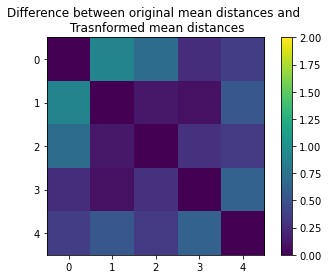

In [49]:
# Code for finding difference between mean distances.
diff_1=abs(mean_dist-trasnformed_mean_dist)
print('Difference between means of Gaussian pair before and after projection.')
print(diff_1)
plt.imshow(diff_1)
plt.clim(0,2)
plt.colorbar()
plt.title("Difference between original mean distances and \n Trasnformed mean distances")
plt.show()

In [42]:
# Projecting  Gaussian distributions Data to low dimension by using PCA.
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
Pca1 = pca.fit_transform(c1)
Pca2 = pca.fit_transform(c2)
Pca3 = pca.fit_transform(c3)
Pca4 = pca.fit_transform(c4)
Pca5 = pca.fit_transform(c5)

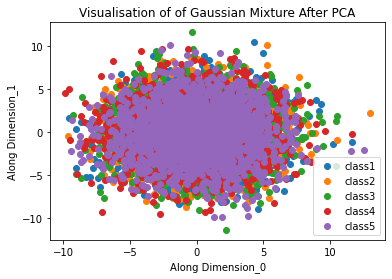

In [43]:
# Code for Plotting Data After projection using PCA.
xpoint1=[]
ypoint1=[]
for point in Pca1:
    xpoint1.append(point[0])
    ypoint1.append(point[1])
plt.scatter(xpoint1,ypoint1,label='class1')
xpoint2=[]
ypoint2=[]
for point in Pca2:
    xpoint2.append(point[0])
    ypoint2.append(point[1])
plt.scatter(xpoint2,ypoint2,label='class2')
xpoint3=[]
ypoint3=[]
for point in Pca3:
    xpoint3.append(point[0])
    ypoint3.append(point[1])
plt.scatter(xpoint3,ypoint3,label='class3')
xpoint4=[]
ypoint4=[]
for point in Pca4:
    xpoint4.append(point[0])
    ypoint4.append(point[1])
plt.scatter(xpoint4,ypoint4,label='class4')
xpoint5=[]
ypoint5=[]
for point in Pca5:
    xpoint5.append(point[0])
    ypoint5.append(point[1])
plt.scatter(xpoint5,ypoint5,label='class5')
plt.xlabel("Along Dimension_0")
plt.ylabel("Along Dimension_1")
plt.title("Visualisation of of Gaussian Mixture After PCA")
plt.legend()
plt.show()

In [44]:
# Code forFinding Mean After PCA Projection.
Transformed_PCA_Classes= { "Pca1":Pca1, "Pca2" : Pca2, "Pca3" : Pca3 , "Pca4" : Pca4 , "Pca5" : Pca5}
PCA_transformed_mean=[]
temp=0
for clss in Transformed_PCA_Classes.values():
    temp=np.mean(clss)
    PCA_transformed_mean.append(temp)
PCA_transformed_mean = np.array(PCA_transformed_mean).reshape(-1,1)

[[0.00000000e+00 2.41975329e-16 6.37037090e-16 3.09334780e-16
  2.06092921e-16]
 [2.41975329e-16 0.00000000e+00 3.95061761e-16 6.73594514e-17
  3.58824082e-17]
 [6.37037090e-16 3.95061761e-16 0.00000000e+00 3.27702310e-16
  4.30944169e-16]
 [3.09334780e-16 6.73594514e-17 3.27702310e-16 0.00000000e+00
  1.03241860e-16]
 [2.06092921e-16 3.58824082e-17 4.30944169e-16 1.03241860e-16
  0.00000000e+00]]


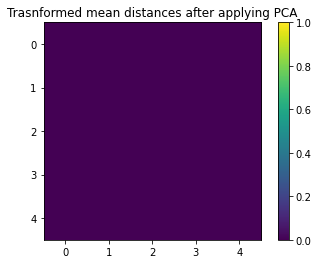

In [45]:
# Code for finding  Euclidian Distance Between Mean of Gaussian mixtures after projecting data by using PCA.
PCA_trasnformed_mean_dist = euclidean_distances(PCA_transformed_mean)
print(PCA_trasnformed_mean_dist)
plt.imshow(PCA_trasnformed_mean_dist)
plt.colorbar()
plt.clim(0,1)
plt.title("Trasnformed mean distances after applying PCA")
plt.show()

[[0.         0.59112373 0.62744052 0.36582104 0.27719344]
 [0.59112373 0.         0.0363168  0.95694477 0.31393029]
 [0.62744052 0.0363168  0.         0.99326157 0.35024709]
 [0.36582104 0.95694477 0.99326157 0.         0.64301448]
 [0.27719344 0.31393029 0.35024709 0.64301448 0.        ]]


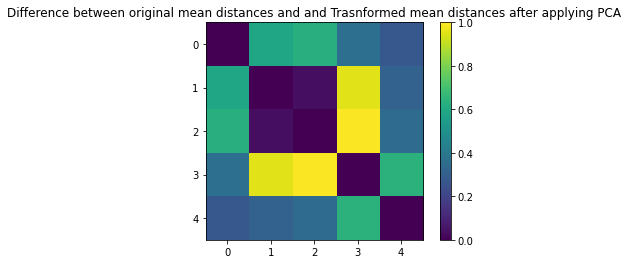

In [46]:
# Code for finding difference between mean distances.
diff_2=abs(mean_dist-PCA_trasnformed_mean_dist)
print(diff_2)
plt.imshow(diff_2)
plt.clim(0,1)
plt.colorbar()
plt.title("Difference between original mean distances and and Trasnformed mean distances after applying PCA")
plt.show()